<a href="https://colab.research.google.com/github/iamsusmita/ExChange/blob/main/Portfolio_Profits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
data=pd.read_csv('S&P500-Portfolio.csv', parse_dates=True, index_col='Date')
data

,AAPL,AMD,AMZN,CSCO,EBAY,GE,GOOG,IBM,NVDA,ORCL
Date,,,,,,,,,,
03-01-2006,2.254447,32.400002,2.379000,11.733191,17.057524,105.309349,10.827798,43.772892,0.292137,10.224232
04-01-2006,2.261083,32.560001,2.362500,12.002143,17.076714,105.160484,11.076829,43.714226,0.300316,10.240461
05-01-2006,2.243289,33.680000,2.382500,12.338334,17.602324,104.892517,11.226100,44.007599,0.307118,10.378406
06-01-2006,2.301195,33.779999,2.393500,12.620740,17.897747,105.607086,11.584846,45.314480,0.312163,10.646184
09-01-2006,2.293655,33.250000,2.354000,12.815731,17.874727,105.339142,11.615694,44.663723,0.320876,10.451439
...,...,...,...,...,...,...,...,...,...,...
22-12-2023,192.868149,139.600006,153.419998,48.881683,43.366421,100.696007,142.557770,157.716400,48.823704,105.152885
26-12-2023,192.320206,143.410004,153.410004,49.067101,43.029938,101.315971,142.657669,158.757217,49.272640,105.142990
27-12-2023,192.419830,146.070007,153.339996,49.223240,42.930973,101.960182,141.279236,159.000397,49.410622,104.895462


In [27]:
# calculate daily returns
returns=data.pct_change()
#returns

# calculate cumulative returns
cumulative_returns=(1+returns).cumprod()
cumulative_returns

,AAPL,AMD,AMZN,CSCO,EBAY,GE,GOOG,IBM,NVDA,ORCL
Date,,,,,,,,,,
03-01-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-01-2006,1.002943,1.004938,0.993064,1.022922,1.001125,0.998586,1.022999,0.998660,1.027997,1.001587
05-01-2006,0.995050,1.039506,1.001471,1.051575,1.031939,0.996042,1.036785,1.005362,1.051282,1.015079
06-01-2006,1.020736,1.042593,1.006095,1.075644,1.049258,1.002827,1.069917,1.035218,1.068550,1.041270
09-01-2006,1.017391,1.026235,0.989491,1.092263,1.047909,1.000283,1.072766,1.020351,1.098377,1.022222
...,...,...,...,...,...,...,...,...,...,...
22-12-2023,85.550075,4.308642,64.489282,4.166103,2.542363,0.956192,13.165906,3.603061,167.126242,10.284674
26-12-2023,85.307025,4.426234,64.485081,4.181906,2.522637,0.962080,13.175132,3.626839,168.662977,10.283706
27-12-2023,85.351215,4.508333,64.455653,4.195214,2.516835,0.968197,13.047827,3.632394,169.135295,10.259496


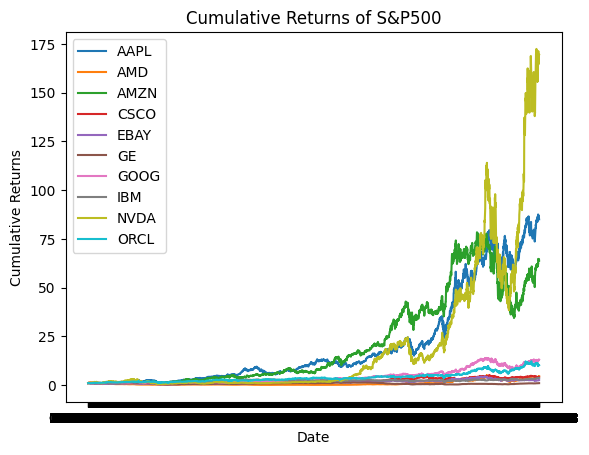

In [28]:
#plot the returns
plt.plot(cumulative_returns, label = cumulative_returns.columns)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of S&P500')
plt.legend()
plt.show()

In [29]:
# create dataframe for portfolio

Results=pd.DataFrame()
Results['Tickers']=cumulative_returns.columns
Results['#Shares']=[1,2,3,4,5,6,7,8,9,10]
Results['Cumulative Returns']=cumulative_returns.tail(1).values[0]
Results['Last Closed Price']=data.tail(1).values[0]
Results['End Amount']=Results['#Shares'] * Results['Cumulative Returns'] * data.head(1).values[0]
Results['Check End Amount'] = Results['#Shares'] * Results['Last Closed Price']

Results

,Tickers,#Shares,Cumulative Returns,Last Closed Price,End Amount,Check End Amount
0,AAPL,1,85.077241,191.802170,191.802170,191.802170
1,AMD,2,4.549691,147.410004,294.820007,294.820007
2,AMZN,3,63.867173,151.940002,455.820007,455.820007
3,CSCO,4,4.201868,49.301315,197.205261,197.205261
4,EBAY,5,2.530759,43.168488,215.842438,215.842438
5,GE,6,0.963892,101.506844,609.041061,609.041061
6,GOOG,7,13.000779,140.769806,985.388641,985.388641
7,IBM,8,3.634394,159.087936,1272.703491,1272.703491
8,NVDA,9,169.494675,49.515610,445.640488,445.640488
9,ORCL,10,10.210105,104.390480,1043.904800,1043.904800


In [30]:
# Profits
profits=Results.sum(axis=0, skipna=True)[4]
profits

<ipython-input-30-d372b2fc9a30>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  profits=Results.sum(axis=0, skipna=True)[4]


5712.168365478508

In [31]:
data1=pd.read_csv('SPX.csv', parse_dates=True, index_col='Date')
data1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-26,1095.800049,1103.689941,1089.859985,1092.170044,1092.170044,4731910000
2010-01-27,1091.939941,1099.510010,1083.109985,1097.500000,1097.500000,5319120000
2010-01-28,1096.930054,1100.219971,1078.459961,1084.530029,1084.530029,5452400000
2010-01-29,1087.609985,1096.449951,1071.589966,1073.869995,1073.869995,5412850000
2010-02-01,1073.890015,1089.380005,1073.890015,1089.189941,1089.189941,4077610000
...,...,...,...,...,...,...
2024-08-19,5557.229980,5608.299805,5550.740234,5608.250000,5608.250000,3222050000
2024-08-20,5602.879883,5620.509766,5585.500000,5597.120117,5597.120117,2994420000
2024-08-21,5603.089844,5632.680176,5591.569824,5620.850098,5620.850098,3119670000


In [32]:
# calculate daily returns
returns1=data1.pct_change()
#returns

# calculate cumulative returns
cumulative_returns1=(1+returns1).cumprod()
cumulative_returns1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-26,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-27,0.996477,0.996213,0.993807,1.004880,1.004880,1.124096
2010-01-28,1.001031,0.996856,0.989540,0.993005,0.993005,1.152262
2010-01-29,0.992526,0.993440,0.983236,0.983244,0.983244,1.143904
2010-02-01,0.980005,0.987034,0.985347,0.997271,0.997271,0.861726
...,...,...,...,...,...,...
2024-08-19,5.071391,5.081409,5.093076,5.134960,5.134960,0.680920
2024-08-20,5.113049,5.092472,5.124970,5.124770,5.124770,0.632814
2024-08-21,5.113241,5.103499,5.130540,5.146497,5.146497,0.659283


In [35]:
SP500_profilts=cumulative_returns1['Close'].tail(1).values[0] * 5000
SP500_profilts

25795.47889064801